In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train=pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# import the test data

df_test= pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
# merge both train and test data
df = pd.concat([df_train, df_test])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
df.drop(['User_ID'], axis=1, inplace=True)   #  axis 1 means drop column , inplace=True means drop from original dataframe and save it

In [6]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
df.isnull().sum()  # check for null values

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [8]:
pd.get_dummies(df['Gender'], drop_first=True)  # convert categorical variable into dummy/indicator variables

,M
0,False
1,False
2,False
3,False
4,True
...,...
233594,False
233595,False
233596,False
233597,False


In [9]:
# handeling categorical feature Gender
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})  # map
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
# handle categorical feature Age
df['Age'].unique()  # check unique values in Age column

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
# target encoding for Age feature
df['Age'] = df['Age'].map({
    '0-17': 0,
    '18-25': 1,
    '26-35': 2,
    '36-45': 3,
    '46-50': 4,
    '51-55': 5,
    '55+': 6
})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
# fixing categorical feature City_Category
df_city = pd.get_dummies(df['City_Category'], drop_first=True)  # convert categorical variable into dummy/indicator variables
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [13]:
df=pd.concat([df, df_city], axis=1)  # concatenate the new dummy variables with the original dataframe
# we did so as we don't need 3 variales abc to use, 2 are enough to represent the third one
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0,False,True


In [14]:
# drop city category as we have already created dummy variables
df.drop(['City_Category'], axis=1, inplace=True)  # drop the original categorical column
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969.0,False,True


In [15]:
df.isnull().sum()  # check for null values again

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [16]:
# focus on replacing missing values
df['Product_Category_2'].unique()  

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [17]:
df['Product_Category_2'].value_counts()  # check the value counts of Product_Category_2

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [18]:
# best way is to replace missing values with mode
df['Product_Category_2'].mode()[0]  # get the mode of Product_Category_2

np.float64(8.0)

In [19]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])  # can't work as in next we are cheking is variable called "df['Product_Category_2']"


0          8.0
1          6.0
2          8.0
3         14.0
4          8.0
          ... 
233594     8.0
233595     8.0
233596     5.0
233597    16.0
233598     5.0
Name: Product_Category_2, Length: 783667, dtype: float64

In [20]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])  # same as above

In [21]:
df['Product_Category_2'].isnull().sum()  # check if there are still any missing values in Product_Category_2

np.int64(0)

In [22]:
# Product category 3 replace missing values with mode
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [23]:
df['Product_Category_3'].value_counts()  

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [24]:
# best way is to replace missing values with mode
df['Product_Category_3'].mode()[0] 

np.float64(16.0)

In [25]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])  # same as above

In [26]:
df['Product_Category_3'].isnull().sum()  # check if there are still any missing values in Product_Category_3

np.int64(0)

In [27]:
df.head(20)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,1,6,16,4+,0,8,8.0,16.0,7969.0,False,True
5,P00193542,1,2,15,3,0,1,2.0,16.0,15227.0,False,False
6,P00184942,1,4,7,2,1,1,8.0,17.0,19215.0,True,False
7,P00346142,1,4,7,2,1,1,15.0,16.0,15854.0,True,False
8,P0097242,1,4,7,2,1,1,16.0,16.0,15686.0,True,False
9,P00274942,1,2,20,1,1,8,8.0,16.0,7871.0,False,False


In [28]:
df['Stay_In_Current_City_Years'].unique()  

array(['2', '4+', '3', '1', '0'], dtype=object)

In [29]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace({'4+': '4'}) # replace '4+' with '4' in Stay_In_Current_City_Years

In [30]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969.0,False,True


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(5), object(2)
memory usage: 67.3+ MB


In [32]:
# Stay_In_Current_City_Years  783667 non-null  object        object is a problematic data type, we need to convert it to int
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)  # convert to int

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(6), object(1)
memory usage: 67.3+ MB


In [34]:
df['B'] =df['B'].astype(int)  # convert B to int
df['C'] = df['C'].astype(int)  # convert C to int

In [35]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969.0,0,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


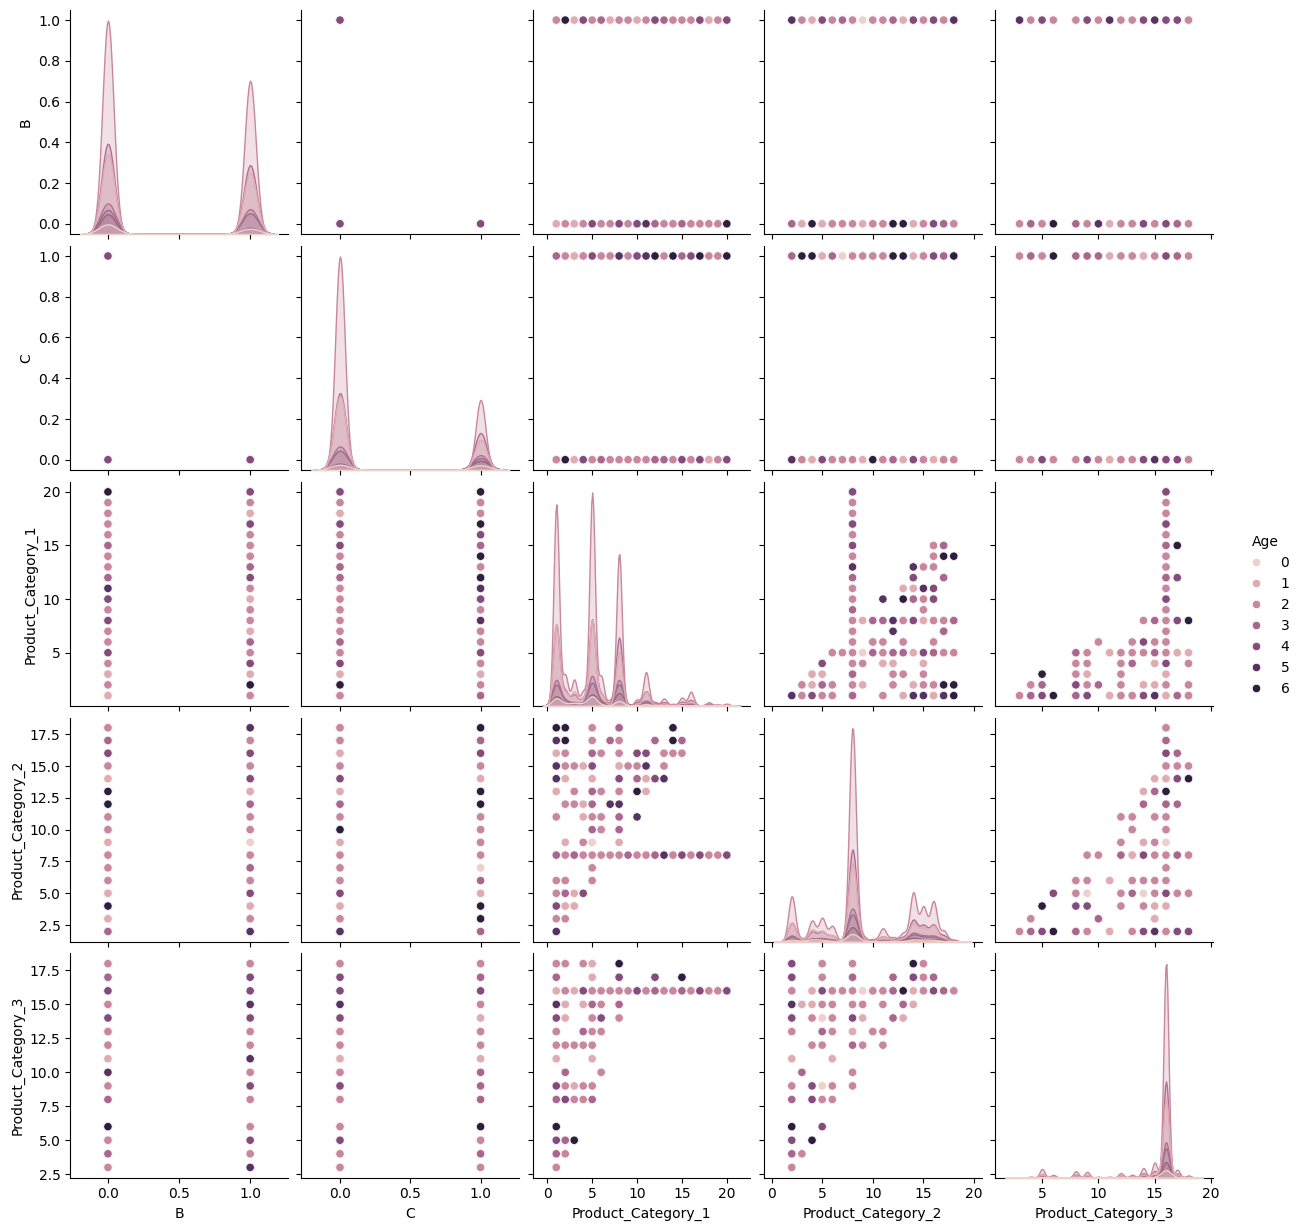

In [37]:
sns.pairplot(df, hue='Age', vars=['B', 'C', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'])


<Axes: xlabel='Age', ylabel='Purchase'>

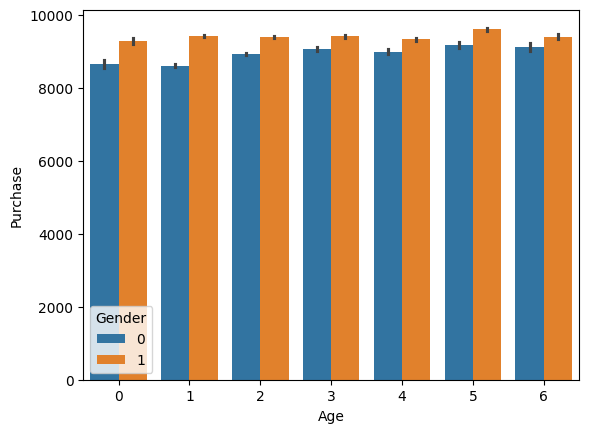

In [38]:
sns.barplot(x='Age', y='Purchase', data=df,hue='Gender')

<Axes: xlabel='Occupation', ylabel='Purchase'>

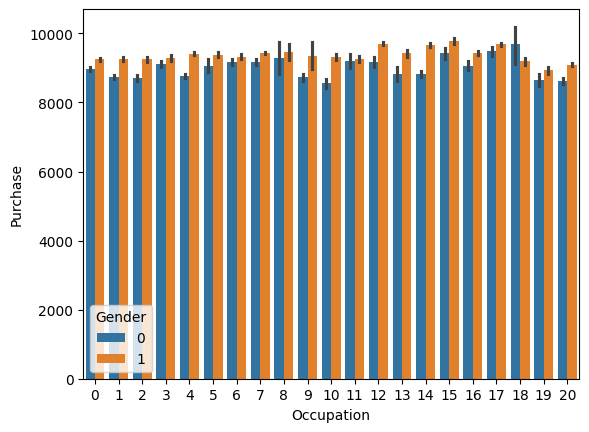

In [39]:
sns.barplot(x='Occupation', y='Purchase', data=df, hue='Gender')

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

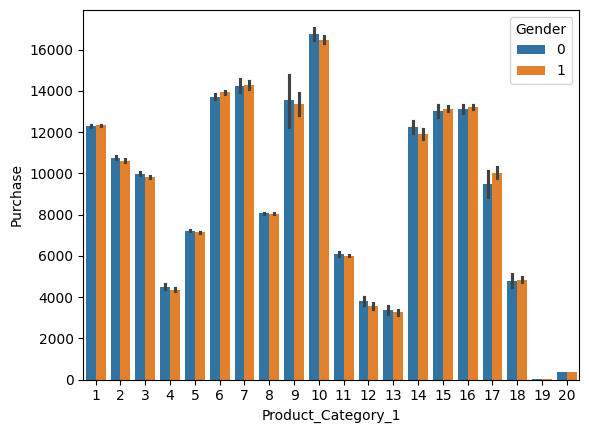

In [40]:
sns.barplot(x='Product_Category_1', y='Purchase', data=df, hue='Gender')

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

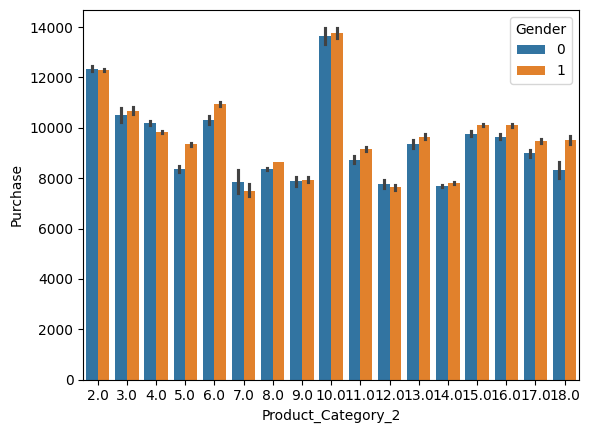

In [41]:
sns.barplot(x='Product_Category_2', y='Purchase', data=df, hue='Gender')

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

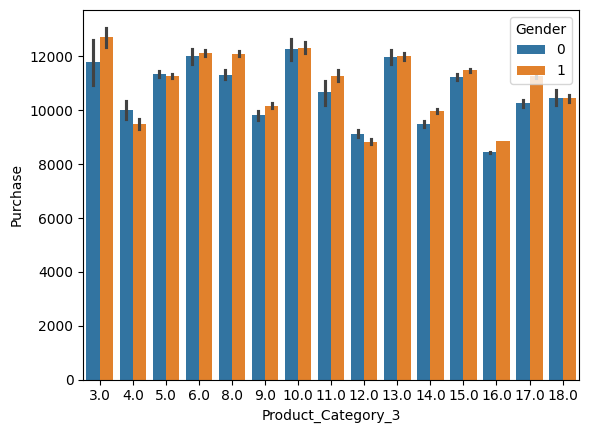

In [42]:
sns.barplot(x='Product_Category_3', y='Purchase', data=df, hue='Gender')

In [43]:
# feature scaling
df_test = df[df['Purchase'].isnull()]  # separate test data

In [44]:
df_train = df[~df['Purchase'].isnull()]  # separate train data

In [45]:
X=df_train.drop('Purchase',axis=1)

In [46]:
X.shape

(550068, 11)

In [47]:
y

NameError: name 'y' is not defined

X.head()

In [ ]:
# sklearn train test split
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test =  train_test_split(X,y,test_size=0.33, random_state=42)  # split the data into train and test sets

NameError: name 'y' is not defined

In [ ]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

NameError: name 'X_train' is not defined

In [ ]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

NameError: name 'X_train' is not defined

In [ ]:
## train ur model